In [1]:
import sys
import os
from pysides.load_params import *
import matplotlib
import pickle
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LogNorm
import matplotlib.patches as patches
from gen_all_sizes_TIM_cubes import sorted_files_by_n

import glob


In [2]:
params = load_params('PAR_FILES/SIDES_from_original_with_fir_lines.par')
TIM_params = load_params('PAR_FILES/Uchuu_cubes_for_TIM.par')

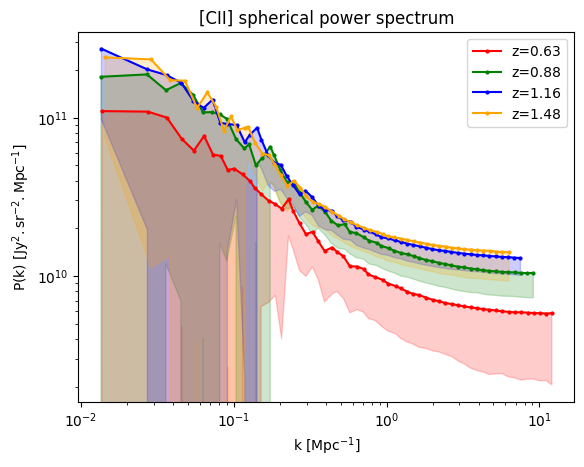

In [23]:
for n, (tile_sizeRA, tile_sizeDEC) in enumerate(TIM_params['tile_sizes']):
    if(n!=0): continue
    dict_pks_name=TIM_params['output_path']+f'pySIDES_from_uchuu_{tile_sizeRA}_x_{tile_sizeDEC}.p' 
    dict = pickle.load( open(dict_pks_name, 'rb'))
    nb_subfields = len(dict.keys())
    for z_center, c in zip(TIM_params['z_centers'], ('r', 'g', 'b', 'orange')):
        pk_sphere_list = []
        k = dict[f'{l}'][f'pk_3D_z{z_center}_CII_de_Looze']['k_out_sphere #Mpc-1'].value
        for l in range(nb_subfields):
            pk_sphere_list.append(dict[f'{l}'][f'pk_3D_z{z_center}_CII_de_Looze']['pk_out_sphere #Jy2sr-2Mpc3'].value)
        pk_sphere_list = np.asarray(pk_sphere_list)
        plt.loglog(k,np.mean(pk_sphere_list, axis=0),'-o',c=c,label=f'z={z_center}', markersize=2 )
        plt.fill_between(k,np.mean(pk_sphere_list, axis=0),
                           np.mean(pk_sphere_list, axis=0)-np.std(pk_sphere_list, axis=0),
                           np.mean(pk_sphere_list, axis=0)+np.std(pk_sphere_list, axis=0),
                         color=c,alpha=0.2 )
        plt.xlabel('k [$\\rm Mpc^{-1}$]')
        plt.ylabel('P(k) [$\\rm Jy^2.sr^{-2}.Mpc^{-1}$]')
        plt.title('[CII] spherical power spectrum')

    plt.legend()
